<a href="https://colab.research.google.com/github/Pedro4010/caseifood/blob/main/clusterizacao_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Ifood

### O objetivo desse trabalho é desenvolver um modelo preditivo que vai produzir maior retorno para a próxima campanha de marketing do Ifood, além de entender as características dos clientes que estão dispostos a comprar o produto.
### Este notebook possui análises de agrupamento.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Conectando ao drive e lendo o csv através do pandas.
drive.mount('/content/drive')
customers = pd.read_csv('/content/drive/MyDrive/googlecolab/ifood_cleaned.csv', index_col = 'ID')

KeyboardInterrupt: ignored

##### O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contatados. Além disso, contém um sinalizador para os clientes que responderam à campanha.


**Feature** -> **Descrição**
*   AcceptedCmp1 -> 1 se o cliente aceitou a oferta na 1st campanha, 0 se não.
*   AcceptedCmp2 -> 1 se o cliente aceitou a oferta na 2st campanha, 0 se não.
*   AcceptedCmp3 -> 1 se o cliente aceitou a oferta na 3st campanha, 0 se não.
*   AcceptedCmp4 -> 1 se o cliente aceitou a oferta na 4st campanha, 0 se não.
*   AcceptedCmp5 -> 1 se o cliente aceitou a oferta na 5st campanha, 0 se não.
*   Response(target) -> 1 se o cliente aceitou a oferta na última campanha, 0 se não.
*   Complain -> 1 se o cliente reclamou nos últimos 2 anos
*   DtCustomer -> dados de cadastro do cliente na empresa
*   Education -> nível de instrução do cliente
*   Marital -> estado civil do cliente
*   Kidhome -> número de crianças pequenas na casa do cliente
*   Teenhome -> número de adolescentes na casa do cliente
*   Income -> renda familiar anual do cliente
*   MntFishProducts -> valor gasto em produtos de peixe nos últimos 2 anos 
*   MntMeatProducts -> valor gasto em produtos de carne nos últimos 2 anos
*   MntFruits -> valor gasto em produtos de frutas nos últimos 2 anos
*   MntSweetProducts -> valor gasto em produtos doces nos últimos 2 anos
*   MntWines -> valor gasto em produtos vitivinícolas nos últimos 2 anos
*   MntGoldProds -> valor gasto em produtos de ouro (especiais) nos últimos 2 anos
*   NumDealsPurchases -> número de compras feitas com desconto
*   NunCatalogPurchases -> número de compras feitas usando o catálogo
*   NunStorePurchases -> número de compras feitas diretamente nas lojas
*   NumWebPurchases -> número de compras feitas através do site da empresa 
*   NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
*   Recency -> número de dias desde a última compra
*   Total Accepted -> Total de vezes que um único cliente aceitou a alguma das 5 tentativas da campanha
*   Age -> Idade do cliente
*   Days a customer -> Tempo que a pessoa se tornou cliente





# Insights

##### As colunas estão em um ponto de tratamento ok. Nesse ponto já conseguimos tirar vários insights.
##### Algumas das perguntas de negócios que podem ser respondidas com um tratamento prévio dos dados:
*   Qual a média de idade dos clientes que mais aderiram a campanha ?
*   Por qual meio esses clientes efetuaram as compras ?
*   Como é o comportamento dos clientes que usam cupons mas não aderem a campanha ?
*   75% das pessoas que não aderiram a campanha nenhuma vez ganham menos de 64000, enquanto a média salarial das pessoas que aderiram 4 vezes a campanha passa dos 80000.





In [ ]:
pd.set_option('max_columns',39)

In [ ]:
customers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,0,0,0,0,1,0,0,0,1617,0,0,1,0,0
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,0,0,0,0,1,0,0,0,27,0,0,1,0,0
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,0,0,0,0,0,1,0,0,776,0,0,1,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,0,0,0,0,0,1,0,0,53,0,0,1,0,0
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,0,0,0,1,0,0,0,0,422,0,0,0,0,1


In [ ]:
customers_4acc = customers[customers['Total_Accepted']==0]
customers_4acc.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1777.0,2.348340,0.530265,1.0,2.0,2.0,3.0,3.0
Income,1777.0,48538.152555,20348.268087,1730.0,33438.0,47352.0,63887.0,162397.0
Recency,1777.0,49.340461,28.986882,0.0,24.0,50.0,75.0,99.0
MntWines,1777.0,223.855937,264.796519,0.0,18.0,102.0,368.0,1396.0
MntFruits,1777.0,23.613393,37.673453,0.0,1.0,7.0,28.0,199.0
MntMeatProducts,1777.0,134.739449,197.660774,0.0,13.0,49.0,171.0,1725.0
MntFishProducts,1777.0,32.948790,50.696069,0.0,2.0,10.0,39.0,259.0
MntSweetProducts,1777.0,23.683737,38.337688,0.0,1.0,7.0,27.0,263.0
MntGoldProds,1777.0,38.963984,48.771113,0.0,7.0,20.0,49.0,362.0
NumDealsPurchases,1777.0,2.411367,1.965681,0.0,1.0,2.0,3.0,15.0


In [ ]:
customers_60K = customers[customers['Income']>60000.00]

In [ ]:
customers_deals = customers[customers['NumDealsPurchases']>=5]

In [ ]:
customers_deals

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422
5376,2,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,0,43,539,2,1,3,1730
1409,2,40689.0,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,0,0,71,468,2,1,3,444
7373,3,46610.0,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,1,0,70,608,1,2,3,302
4339,3,67353.0,37,702,17,151,0,8,35,5,5,6,12,2,0,0,0,0,0,0,0,0,52,180,2,1,3,913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2,41769.0,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,0,0,67,501,1,1,2,521
4749,2,58554.0,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0,0,54,641,2,2,4,586
4478,2,63777.0,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,0,0,43,462,2,2,4,653


In [ ]:
customers_age = customers[customers['Age']<=40]
customers_age

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6182,2,26646.0000,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
6177,3,33454.0000,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,0,37,417,2,1,3,169
1994,2,51969.8614,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,0,39,226,2,1,3,19
2569,2,17323.0000,38,3,14,17,6,1,5,1,1,0,3,8,0,0,0,0,0,0,0,0,35,627,2,0,2,46
2278,2,33812.0000,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,0,0,37,603,1,1,2,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2,28427.0000,67,18,3,19,3,3,6,2,2,0,3,8,0,0,0,0,0,0,0,0,39,465,2,1,3,52
9246,3,40101.0000,73,171,3,129,26,24,62,4,6,1,6,7,0,0,0,0,0,0,0,0,37,623,2,1,3,415
7366,3,75777.0000,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1,2,40,360,1,0,1,1438


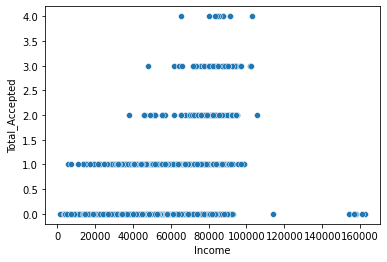

In [ ]:
sns.scatterplot(x="Income", y = "Total_Accepted", data=customers)
plt.show()

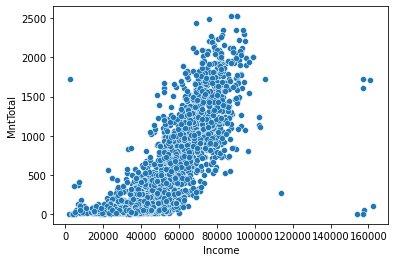

In [ ]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers)
plt.show()

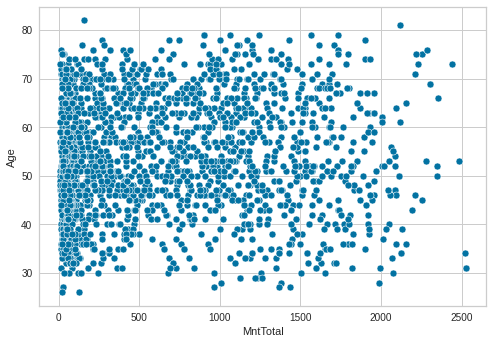

In [ ]:
sns.scatterplot(x="MntTotal", y = "Age", data=customers)
plt.show()

In [ ]:
# boxplot
# grafico de violino

In [ ]:
for col in customers.columns[1:]:
  sns.boxplot(data=customers[col], orient='h')
  plt.title(col)
  plt.show()

In [ ]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [ ]:
customers.describe()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.358036,51969.861400,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.297768,53.194196,353.582143,1.644643,0.950446,2.595089,605.798214
std,0.527432,21405.804535,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.678381,11.984069,202.122512,0.478728,0.751803,0.906959,602.249288
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000,1.000000,5.000000
25%,2.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,180.750000,1.000000,0.000000,2.000000,68.750000
50%,2.000000,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,355.500000,2.000000,1.000000,3.000000,396.000000
75%,3.000000,68275.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,529.000000,2.000000,1.000000,3.000000,1045.500000
max,3.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,129.000000,699.000000,2.000000,3.000000,5.000000,2525.000000


In [ ]:
# Insights. 
# A média de 'Income' é maior nos clientes que aderiram a campanha o maior número de vezes é cerca de 40% maior que no geral. 
# Nos que aderiram 3,2 ou 1 vez a campanha, o valor ganho médio é um fator a se considerar, e parece influenciar em quem aceita a campanha ou não, visto
# que a média diminui consideravelmente se lervamos apenas quem não aderiu em conta.
# Podemos também ver que os clientes que estão acima da média (no caso fiz para acima de 60K para criar uma margem um pouco maior) 
# em Income não tem aderido tanto a campanha, talvez eles sejam um bom foco.
# 2194 clientes fizeram pelo menos uma compra usando um cupom de desconto(NumDealPurchases), um número muito maior do que os que somente aderiram a campanha.
# A idade foi uma variável que me chamou atenção. A idade média é "alta", se pensarmos em quem mais consome produtos por um aplicativo de comidas como o Ifood. Pesquisando na internet achei esse link 
# (https://blog.deliverymuch.com.br/numeros-do-delivery-online-no-brasil/#:~:text=Se%20comparado%20com%20a%20popula%C3%A7%C3%A3o,servi%C3%A7os%20financeiros%20e%20redes%20sociais.)
# Esses dados são de 2020 e mostram que pessoas com mais de 50 anos consomem muito esse tipo de serviço no Brasil.
# Esta mesma pesquisa nos mostra que os cupons de desconto são os mais consumidos. Em nossos dados podemos ver um tendência acima da média de pessoas que consomem
# produtos com desconto (NumDealPurchases). 

# Clusterização

In [ ]:
# Vamos fazer a clusterização agora, porém temos o target (Response), então separamos dele, precisamos do original, sem normalizar.

In [ ]:
# X = Variáveis preditoras.
# Y = Variável que queremos prever.
X = customers.drop('Response', axis=1)
Y = customers['Response']

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.28821696, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [-0.26287812,  1.03255877,  0.90693402, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.91785967, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       ...,
       [ 0.23415413, -0.82521765, -0.92989438, ...,  0.99376941,
        -0.44481565, -0.5263848 ],
       [ 0.80721077, -0.82521765,  0.90693402, ..., -1.00626965,
         2.24812234, -0.5263848 ],
       [ 0.04201381,  1.03255877,  0.90693402, ..., -1.00626965,
        -0.44481565,  1.8997509 ]])

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288217,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.017989,1.531185,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.679417,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
1,-0.262878,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.274587,-1.190545,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-0.961275,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2,0.917860,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.333729,-0.205773,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.282673,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
3,-1.183301,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.291388,-1.061881,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.918094,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
4,0.295460,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.034790,-0.953012,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.305254,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.432369,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.162664,0.135680,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,1.221032,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2236,0.562783,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,1.035390,1.958847,-1.655713,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.268717,-0.315684,-0.157171,-1.006270,-0.444816,1.899751
2237,0.234154,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,1.035390,-1.034790,-0.982703,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,1.054951,-0.315684,-0.157171,0.993769,-0.444816,-0.526385
2238,0.807211,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.103522,-0.977755,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029

In [ ]:
# Dados normalizados. Agora todas as colunas vão possuir o mesmo peso. 
# Para começo da clusterização, vamos tentar encontrar o melhor número de clusters.
# O método do cotovelo é bom para começo das análises 

In [ ]:
def elbow(values):
  wcss = []
  for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('WCSS')
  plt.show()

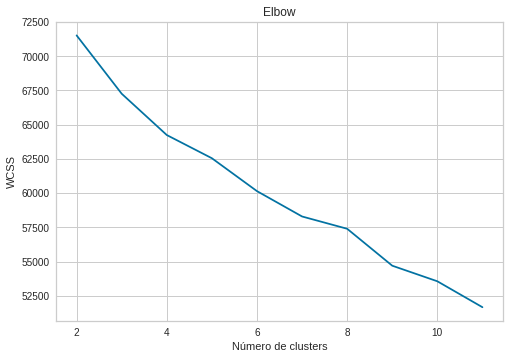

In [ ]:
elbow(X_scaled)

In [ ]:
# Talvez o método do cotovelo não tenha nos deixado próximo de um N ideal. 
# Vamos tentar com algumas análises com a biblioteca yellowbricks.

In [ ]:
def elbow_yellow(values):
  kmeans = KMeans() 
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

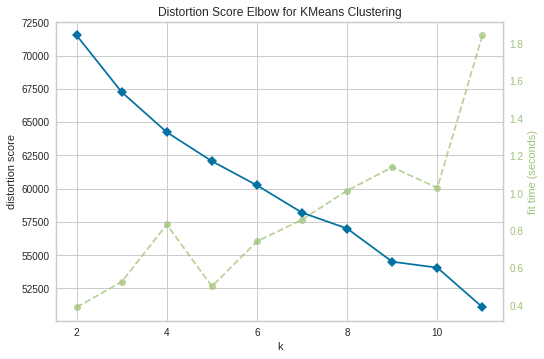

In [ ]:
elbow_yellow(X_scaled)

In [ ]:
def sillhouette(values, k):
  kmeans = KMeans(k) 
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(X_scaled)
  visualizer.show()

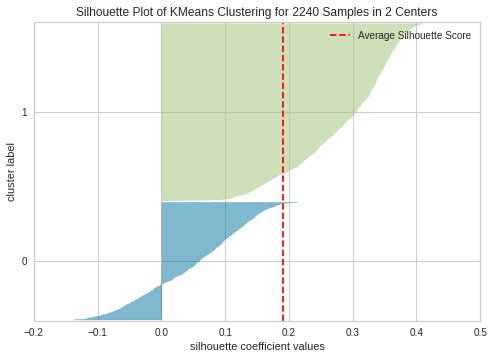

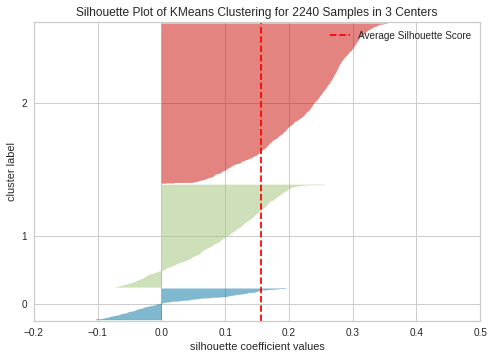

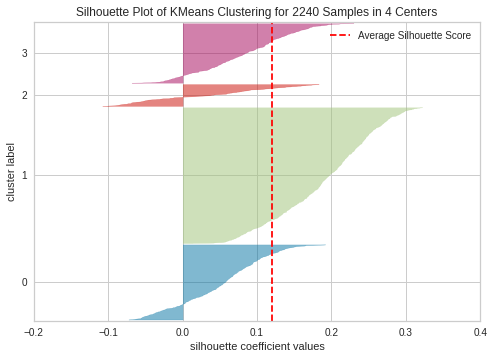

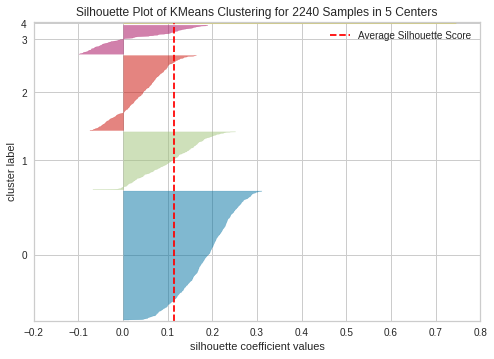

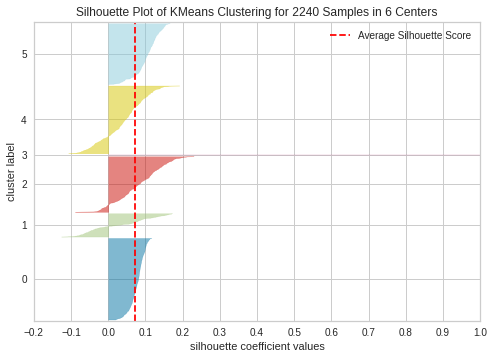

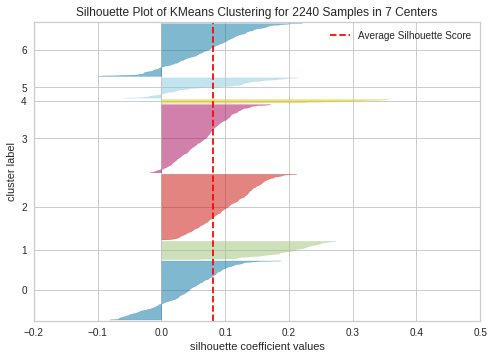

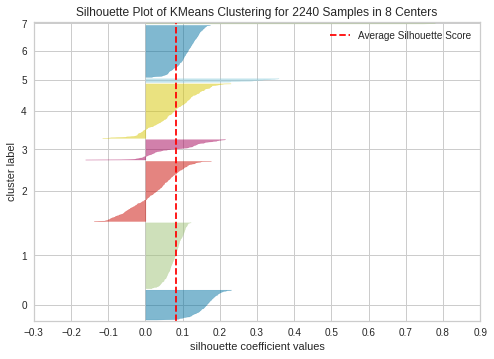

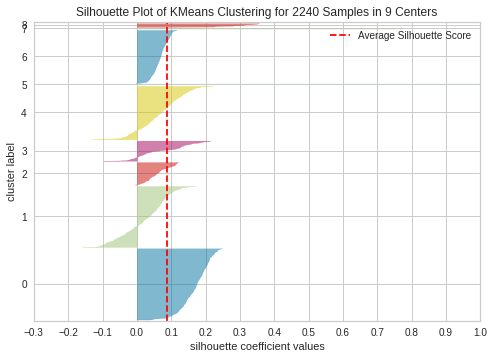

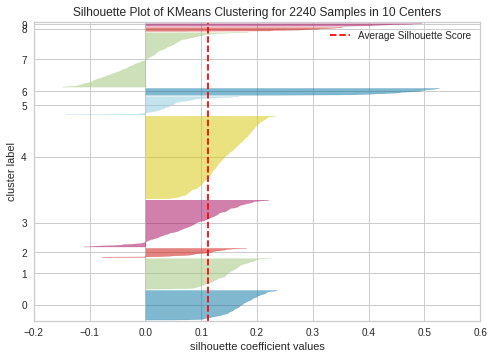

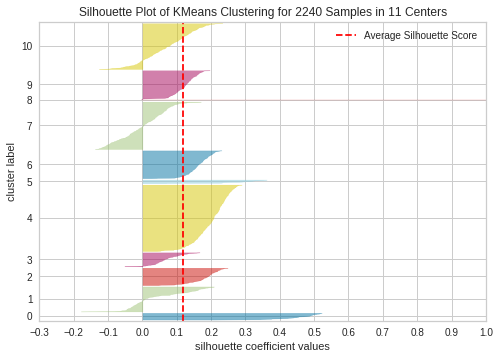

In [ ]:
for i in range(2,12):
  sillhouette(X_scaled, i)

##### Reduzindo a dimensionalidade (poderia ter sido feito antes dessas análises)

In [ ]:
pca = PCA()
pca.fit(X_scaled)
features = range(pca.n_components_)

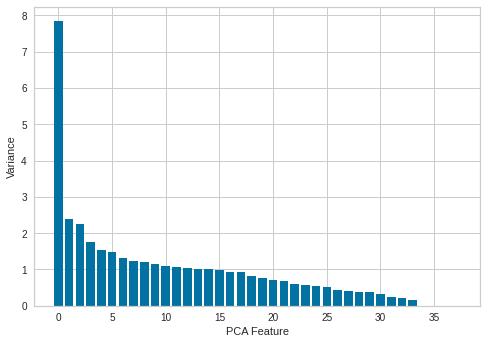

In [ ]:
# Quanto maior a Variance, mais o meu número de componentes consegue explicar a variação dos dados.
# Quando a diferença ficar muito grande, é porque está overfitando, e ali fica um bom lugar para se olhar para o N de clusters.
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [ ]:
# Reduzir a dimensionalidade dos dados para 5. Pensado a partir do gráfico de PCA x Variance.

In [ ]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[ 3.74267544, -2.25108479, -0.58199058,  1.96636401,  0.68460452],
       [-2.56050479, -0.00498662, -0.53569472, -0.34014435,  1.26407475],
       [ 1.58823129, -1.37983717, -0.42287757,  0.06897547,  1.46284196],
       ...,
       [ 2.03017129,  1.54314326, -0.04393537,  0.58273918,  1.27777805],
       [ 1.66760241, -1.29960803,  1.1949335 , -2.11160351,  1.20428075],
       [-2.02693535,  0.05714497,  1.93787985, -0.68182723, -1.62761469]])

In [ ]:
df_X_pca = pd.DataFrame(X_pca, columns=(['PC0','PC1','PC2','PC3','PC4']))
df_X_pca

,PC0,PC1,PC2,PC3,PC4
0,3.742675,-2.251085,-0.581991,1.966364,0.684605
1,-2.560505,-0.004987,-0.535695,-0.340144,1.264075
2,1.588231,-1.379837,-0.422878,0.068975,1.462842
3,-2.743236,0.268345,-1.594289,0.295181,1.370866
4,-0.574664,-0.265308,0.159440,-0.780090,-1.878389
...,...,...,...,...,...
2235,2.555822,-1.889525,0.601602,1.871810,-1.207977
2236,-0.647916,2.038752,2.972146,-0.730158,0.856898
2237,2.030171,1.543143,-0.043935,0.582739,1.277778
2238,1.667602,-1.299608,1.194934,-2.111604,1.204281


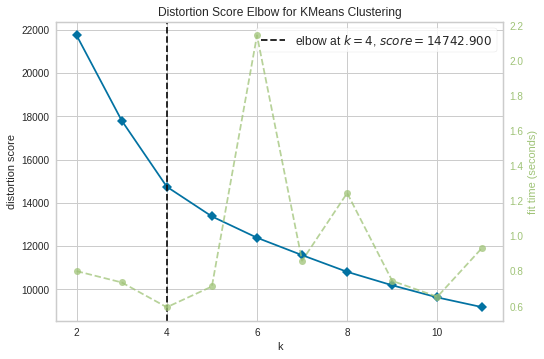

In [ ]:
elbow_yellow(df_X_pca)

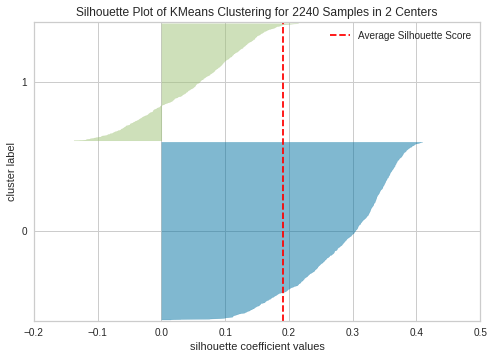

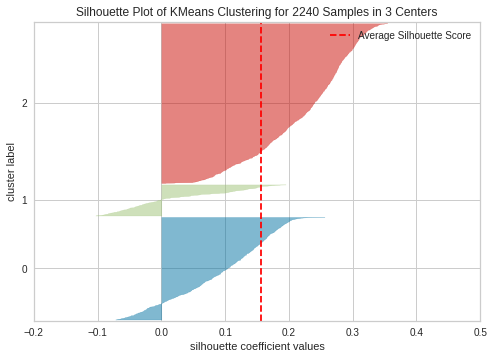

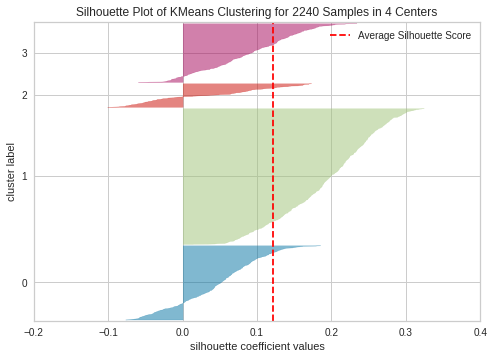

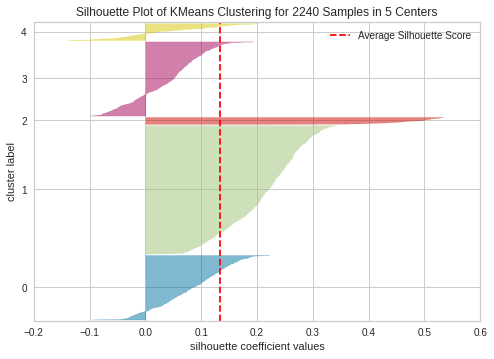

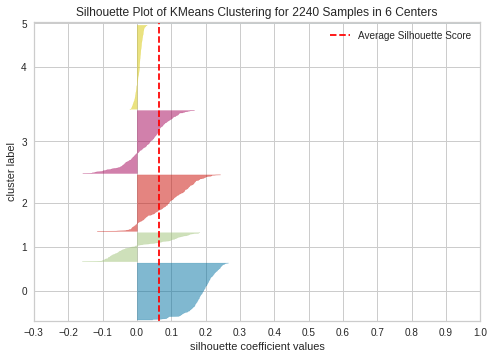

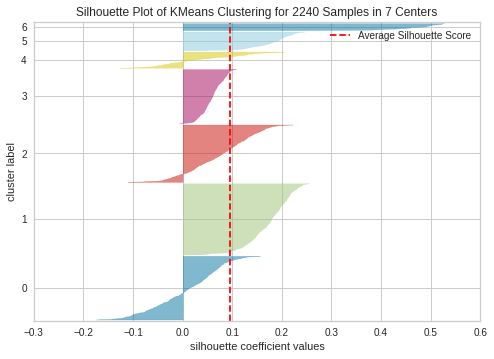

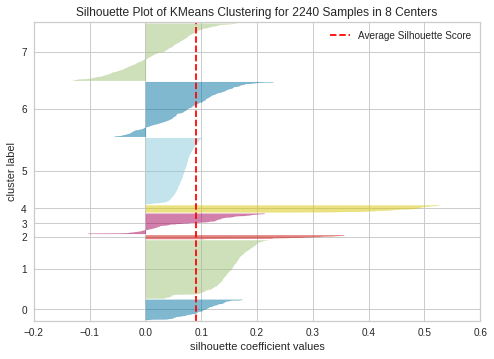

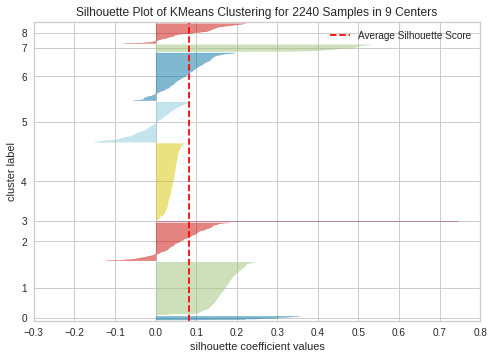

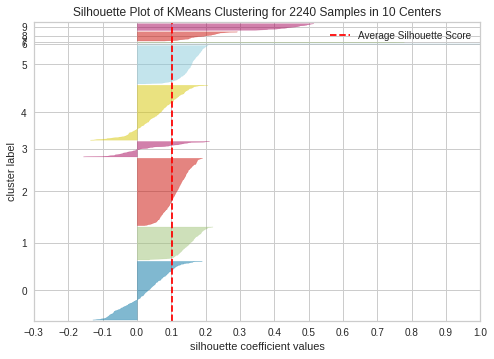

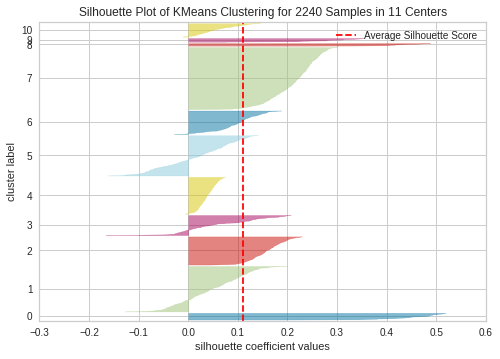

In [ ]:
for i in range(2,12):
  sillhouette(df_X_pca, i)

In [ ]:
# Vamos usar 5 clusters em uma primeira análise, mesmo que o método do cotovelo nos tenha recomendado 4.

In [ ]:
kmeans = KMeans(n_clusters=5)
yKMeans = kmeans.fit_predict(df_X_pca)

In [ ]:
yKMeans

array([0, 3, 0, ..., 2, 2, 1], dtype=int32)

In [ ]:
customers['Cluster'] = yKMeans

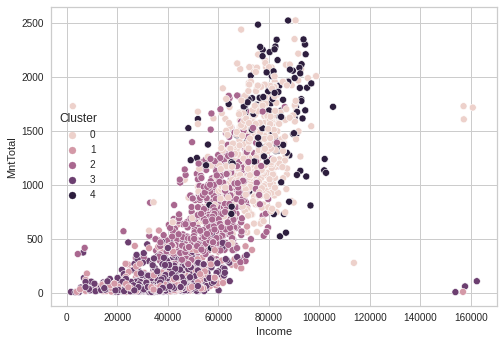

In [ ]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers, hue='Cluster')
plt.show()

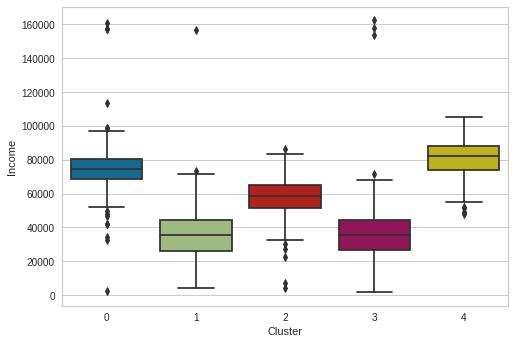

In [ ]:
sns.boxplot(x='Cluster',y='Income',data=customers)
plt.savefig('teste0.png', format='png')
plt.show()

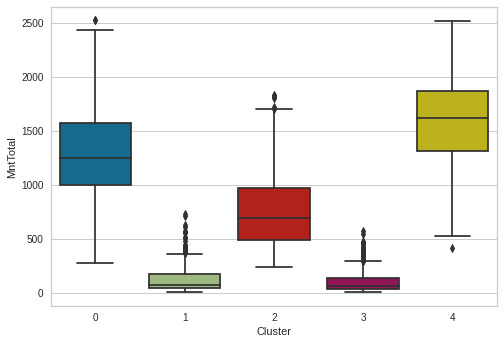

In [ ]:
sns.boxplot(x='Cluster',y='MntTotal',data=customers)
plt.savefig('teste.png', format='png')
plt.show()

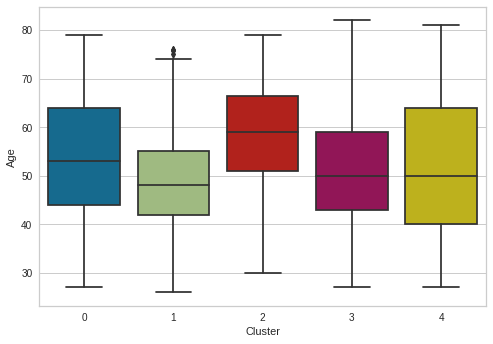

In [ ]:
sns.boxplot(x='Cluster',y='Age',data=customers)
plt.savefig('teste1.png', format='png')
plt.show()

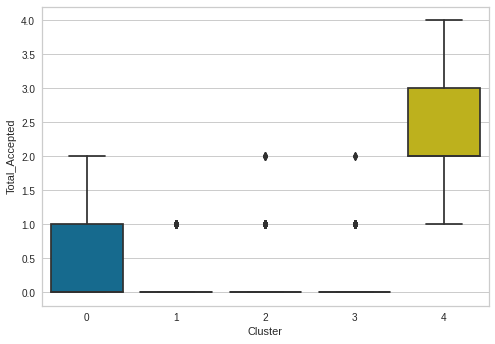

In [ ]:
sns.boxplot(x='Cluster',y='Total_Accepted',data=customers)
plt.savefig('teste2.png', format='png')
plt.show()

In [ ]:
customers[customers['Cluster']==4].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntTotal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.0
mean,80367.688848,0.069767,0.217054,49.472868,914.589147,50.937984,414.527132,74.015504,58.821705,75.968992,1.294574,5.589147,6.162791,8.162791,3.558140,0.232558,0.596899,0.806202,0.658915,...,0.635659,2.503876,51.829457,359.829457,0.007752,0.0,0.085271,0.441860,0.193798,0.232558,0.038760,0.0,1588.860465,0.069767,0.0,0.519380,0.155039,0.255814,4.0
std,11496.067782,0.255748,0.467059,28.844973,330.701164,51.357624,264.996789,66.592157,53.528825,62.446720,1.155172,2.163664,2.410234,2.709332,2.131999,0.424110,0.492433,0.396814,0.475922,...,0.483121,0.662901,13.736427,197.181195,0.088045,0.0,0.280374,0.498544,0.396814,0.424110,0.193774,0.0,433.878110,0.255748,0.0,0.501572,0.363353,0.438019,0.0
min,48192.000000,0.000000,0.000000,1.000000,152.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,27.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,416.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.0
25%,74004.000000,0.000000,0.000000,25.000000,704.000000,17.000000,140.000000,23.000000,19.000000,30.000000,1.000000,4.000000,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,40.000000,188.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1315.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.0
50%,82017.000000,0.000000,0.000000,54.000000,966.000000,28.000000,403.000000,52.000000,42.000000,51.000000,1.000000,5.000000,6.000000,8.000000,3.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,50.000000,360.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1621.000000,0.000000,0.0,1.000000,0.000000,0.000000,4.0
75%,88097.000000,0.000000,0.000000,73.000000,1126.000000,66.000000,612.000000,106.000000,92.000000,119.000000,1.000000,7.000000,8.000000,10.000000,5.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,64.000000,535.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1867.000000,0.000000,0.0,1.000000,0.000000,1.000000,4.0
max,105471.000000,1.000000,2.000000,99.000000,1493.000000,183.000000,974.000000,246.000000,194.000000,245.000000,7.000000,11.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,81.000000,680.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2524.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.0


#### Insights da Clusterização. 
##### Com 5 clusters, a divisão ficou interessante principalmente se olharmos pela renda anual do cliente (income), que talvez seja uma de nossas variáveis mais importantes. Com 5 clusters, as categorias de clientes ficaram bem definidas. Os que mais ganham são os que mais consomem no aplicativo (cluster 4). E também são eles que mais aceitam as campanhas. 
##### O cluster 0 consome um pouco menos que os cluster 4, e também aceita a menos campanhas, porém pode ser um ótimo alvo para nossa nova campanha, visto que eles tem uma renda média anual alta.
##### O cluster 2 gasta mais que os clusters 1 e 3, porém não aceitou a tantas campanhas, também pode ser um bom alvo, visto que a renda média anual deles é consideravelmente maior que dos clusters 1 e 3.
##### Os clusters 1 e 3 nos trazem clientes que gastaram pouco em produtos no aplicativo, aceitaram a campanha pouquíssimas vezes e tem uma renda média anual bem abaixo dos outros clusters. Talvez não seja esse perfil de cliente que estamos buscando para nossa nova campanha.

In [ ]:
#

In [ ]:
# dfi = dfi[['Year_Birth','Dt_Customer','Education','Marital_Status','Income','Kidhome',
#'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
#'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
#'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']

# Como apresentar o trabalho em uma perspectiva de negócios.

#### Começamos do problema, apresentamos o resultado final e depois detalhamos um pouco mais os principais achados.
#### Na clusterização, tentamos descobrir perfis de pessoas diferentes que possam aderir a campanha. Existem perfis diferentes ? Quais são esses perfis ?
#### Detalhamento dos resultados e não do método.
#### Por que esses perfis aderem ou não a campanha ?